In [57]:
%load_ext autoreload
%autoreload 2

In [70]:
from os.path import join
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

from cac.data.audio import AudioItem
from cac.data.transforms import DataProcessor
from cac.utils.viz import plot_raw_audio_signal, plot_spectrogram_image

In [1]:
DATA_DIR = "/data/wiai-facility/"

In [3]:
all_audio_files = glob(join(DATA_DIR, "processed", "audio", "*.wav"))

In [4]:
len(all_audio_files)

83838

### Define transform to convert audio to spectrogram

In [37]:
transforms_cfg = [
    {
        "name": "ToTensor",
        "params": {"device": "cpu"}
    },
    {
        "name": "Resample",
        "params": {
            "orig_freq": 44100,
            "new_freq": 16000
        }
    },
    {
        "name": "BackgroundNoise",
        "params": {
            "dataset_config": [
                {
                    "name": "esc-50",
                    "version": "default",
                    "mode": "all"
                }
            ],
            "min_noise_scale": 0.4,
            "max_noise_scale": 0.75
        }
    },
    {
        "name": "Spectrogram",
        "params": {
            "n_fft": 512,
            "win_length": 512,
            "hop_length": 160
        }
    },
    {
        "name": "MelScale",
        "params": {
            "n_mels": 64,
            "sample_rate": 16000,
            "f_min": 125,
            "f_max": 7500
        }
    },
    {
        "name": "AmplitudeToDB",
        "params": {}
    },
    {
        "name": "ToNumpy",
        "params": {}
    },
]

In [38]:
signal_transform = DataProcessor(transforms_cfg)

Loading items: 100%|██████████| 2000/2000 [00:00<00:00, 319821.88it/s]


### Apply on sample audio

In [62]:
item = AudioItem(path=all_audio_files[10])

In [63]:
signal = item.load()["signal"]

In [64]:
signal.shape

(310271,)

In [65]:
transformed_signal = signal_transform(signal)

In [66]:
transformed_signal.shape

(64, 704)

In [71]:
np.save('../../../cache/sample_signal.npy', signal)
np.save('../../../cache/logmelspec_of_sample_signal.npy', transformed_signal)

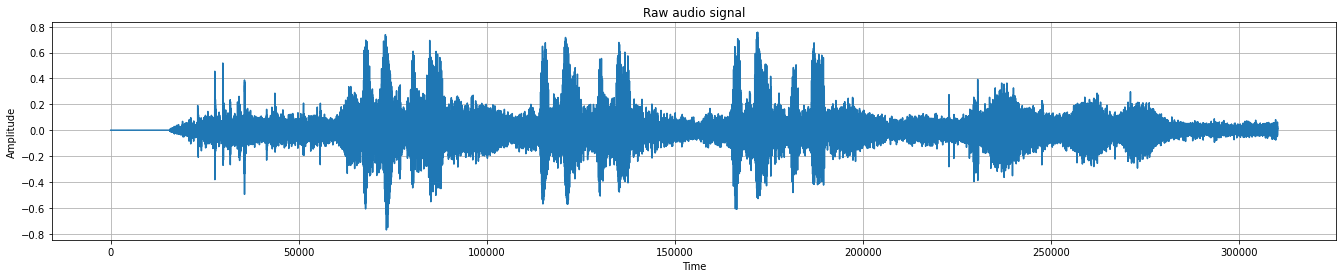

In [67]:
plot_raw_audio_signal(signal)

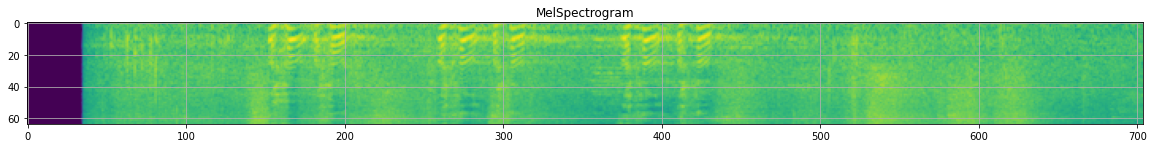

In [68]:
plot_spectrogram_image(transformed_signal)